<a href="https://colab.research.google.com/github/piikkkuuuu/ProgrammingAssignment2/blob/master/Prodigy_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 45

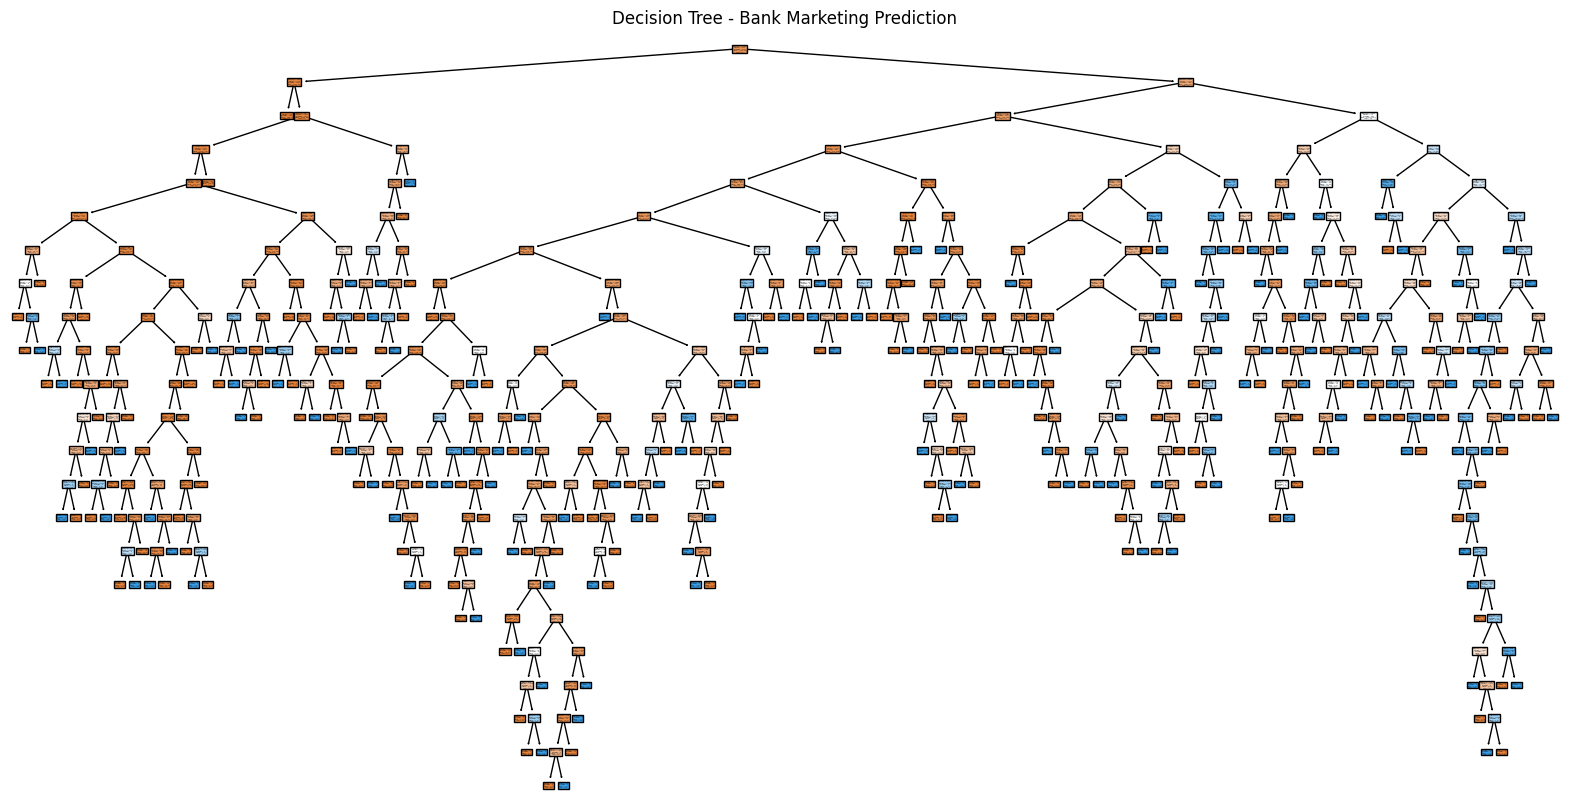

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
# The dataset URL points to the bank marketing dataset.
# It uses a semicolon as a separator, which is handled by sep=';'.
# Updated URL to a more reliable source for direct download.
url = "http://www3.dsi.uminho.pt/pcortez/data/bank.csv"
try:
    df = pd.read_csv(url, sep=';')
except Exception as e:
    print(f"Error loading dataset from URL: {e}")
    print("Please ensure you have an active internet connection and the URL is accessible.")
    # Fallback or exit if data cannot be loaded
    exit()

# Display first 5 rows to verify data loading
print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
df.info()

# Step 2: Encode categorical variables
# Initialize LabelEncoder
le = LabelEncoder()
# Iterate through columns with 'object' dtype (categorical columns)
for col in df.select_dtypes(include='object').columns:
    # Apply Label Encoding to each categorical column
    df[col] = le.fit_transform(df[col])
print("\nFirst 5 rows after Label Encoding:")
print(df.head())

# Step 3: Define features (X) and target (y)
# 'y' is the target variable (deposit: yes/no), so it's dropped from features (X)
X = df.drop('y', axis=1)  # Features
y = df['y']               # Target

# Step 4: Split into training and testing sets
# 70% of data for training, 30% for testing
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Step 5: Train Decision Tree Classifier
# Using 'entropy' as the criterion for information gain
# random_state ensures reproducibility of the tree structure
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)
print("\nDecision Tree Classifier trained successfully.")

# Step 6: Make predictions on the test set
y_pred = clf.predict(X_test)
print("\nPredictions made on the test set.")

# Step 7: Evaluate the model
# Confusion Matrix: Helps visualize the performance of an algorithm
# Classification Report: Provides precision, recall, f1-score, and support for each class
# Accuracy Score: Overall accuracy of the model
print("\n--- Model Evaluation ---")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Step 8: Visualize the Decision Tree
# Set figure size for better readability of the tree
plt.figure(figsize=(20, 10))
# Plot the decision tree
# feature_names: labels for the features in X
# class_names: labels for the target classes (0 -> 'No', 1 -> 'Yes' based on encoding)
# filled=True: colors nodes to indicate majority class
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("Decision Tree - Bank Marketing Prediction")
plt.show()
